In [1]:
#Importing the neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex


In [3]:
df = pd.read_csv("C:\\Users\\ENVY 15\\Desktop\\Untitled Folder\\fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.shape

(2126, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

#### Analyzing the target variable

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

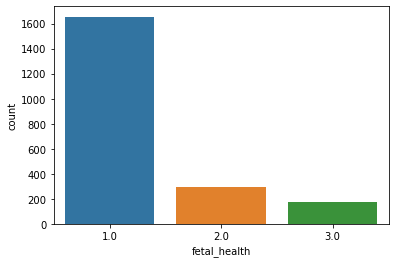

In [6]:
sns.countplot(x='fetal_health',data=df)

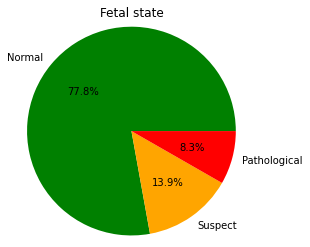

In [9]:
y= df.fetal_health
plt.title("Fetal state")

plt.pie(y.value_counts(),labels=["Normal", "Suspect", "Pathological"], colors = ["green", "orange", "red"],autopct="%1.1f%%",radius=1.2)

plt.show()

### EDA

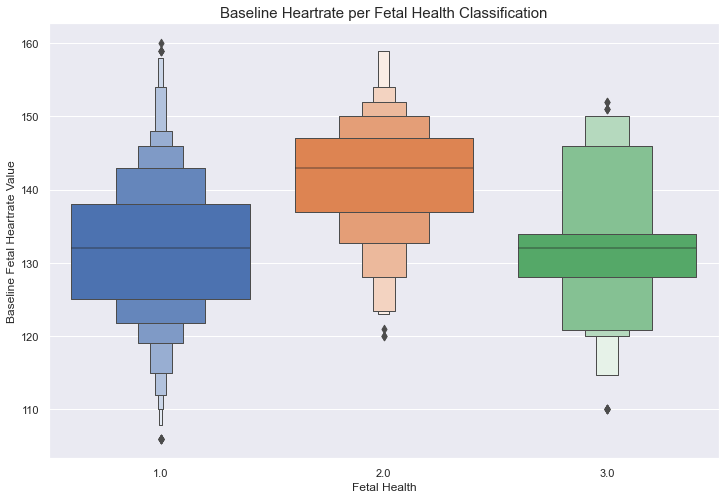

In [15]:
sns.set(font_scale=1.0)
plt.figure(figsize=(12,8))
g = sns.boxenplot(x='fetal_health', y='baseline value', data=df,
             saturation=1.5)
g.set_xlabel('Fetal Health')
g.set_ylabel('Baseline Fetal Heartrate Value')
g.set_title('Baseline Heartrate per Fetal Health Classification', fontsize=15)
plt.show()

#### From this we can see that the suspect group which is 2.0 on the graph tends to have an elevated heartrate.

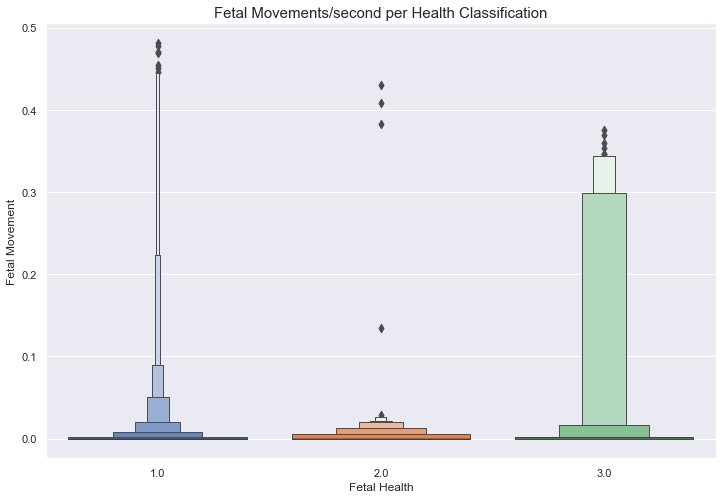

In [17]:
sns.set(font_scale=1.0)
plt.figure(figsize=(12,8))
g = sns.boxenplot(x='fetal_health', y='fetal_movement', data=df,
             saturation=1.5)
g.set_xlabel('Fetal Health')
g.set_ylabel('Fetal Movement')
g.set_title('Fetal Movements/second per Health Classification', fontsize=15)
plt.show()

#### There seems to be more movement from records classified as pathological.

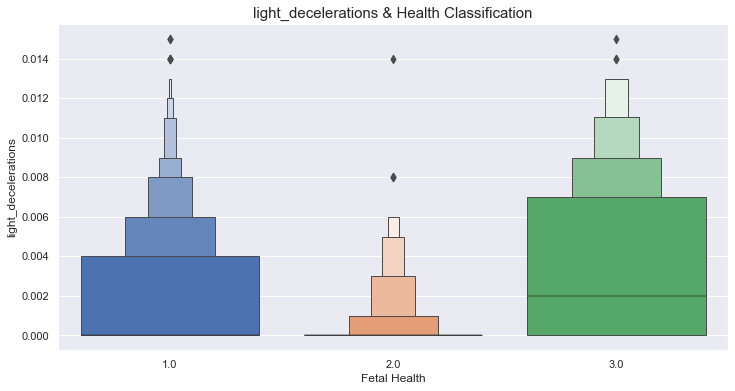

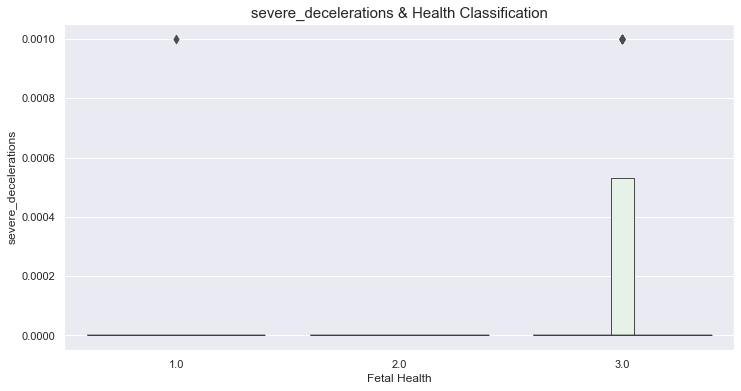

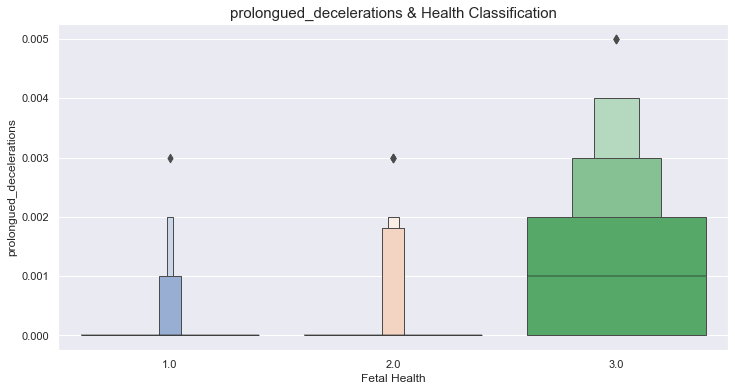

In [21]:
dec_cols = ['light_decelerations', 'severe_decelerations', 'prolongued_decelerations'] #there may be a typo in the last column here

for col in dec_cols:
    sns.set(font_scale=1.0)
    plt.figure(figsize=(12,6))
    g = sns.boxenplot(x='fetal_health', y=col, data=df,
             saturation=1.0)
    g.set_xlabel('Fetal Health')
    g.set_ylabel(col)
    g.set_title('{} & Health Classification'.format(col), fontsize=15)
    plt.show()

array([[<AxesSubplot:title={'center':'baseline value'}>,
        <AxesSubplot:title={'center':'accelerations'}>,
        <AxesSubplot:title={'center':'fetal_movement'}>],
       [<AxesSubplot:title={'center':'uterine_contractions'}>,
        <AxesSubplot:title={'center':'light_decelerations'}>,
        <AxesSubplot:title={'center':'severe_decelerations'}>],
       [<AxesSubplot:title={'center':'prolongued_decelerations'}>,
        <AxesSubplot:title={'center':'abnormal_short_term_variability'}>,
        <AxesSubplot:title={'center':'mean_value_of_short_term_variability'}>],
       [<AxesSubplot:title={'center':'percentage_of_time_with_abnormal_long_term_variability'}>,
        <AxesSubplot:title={'center':'mean_value_of_long_term_variability'}>,
        <AxesSubplot:title={'center':'histogram_width'}>],
       [<AxesSubplot:title={'center':'histogram_min'}>,
        <AxesSubplot:title={'center':'histogram_max'}>,
        <AxesSubplot:title={'center':'histogram_number_of_peaks'}>],
    

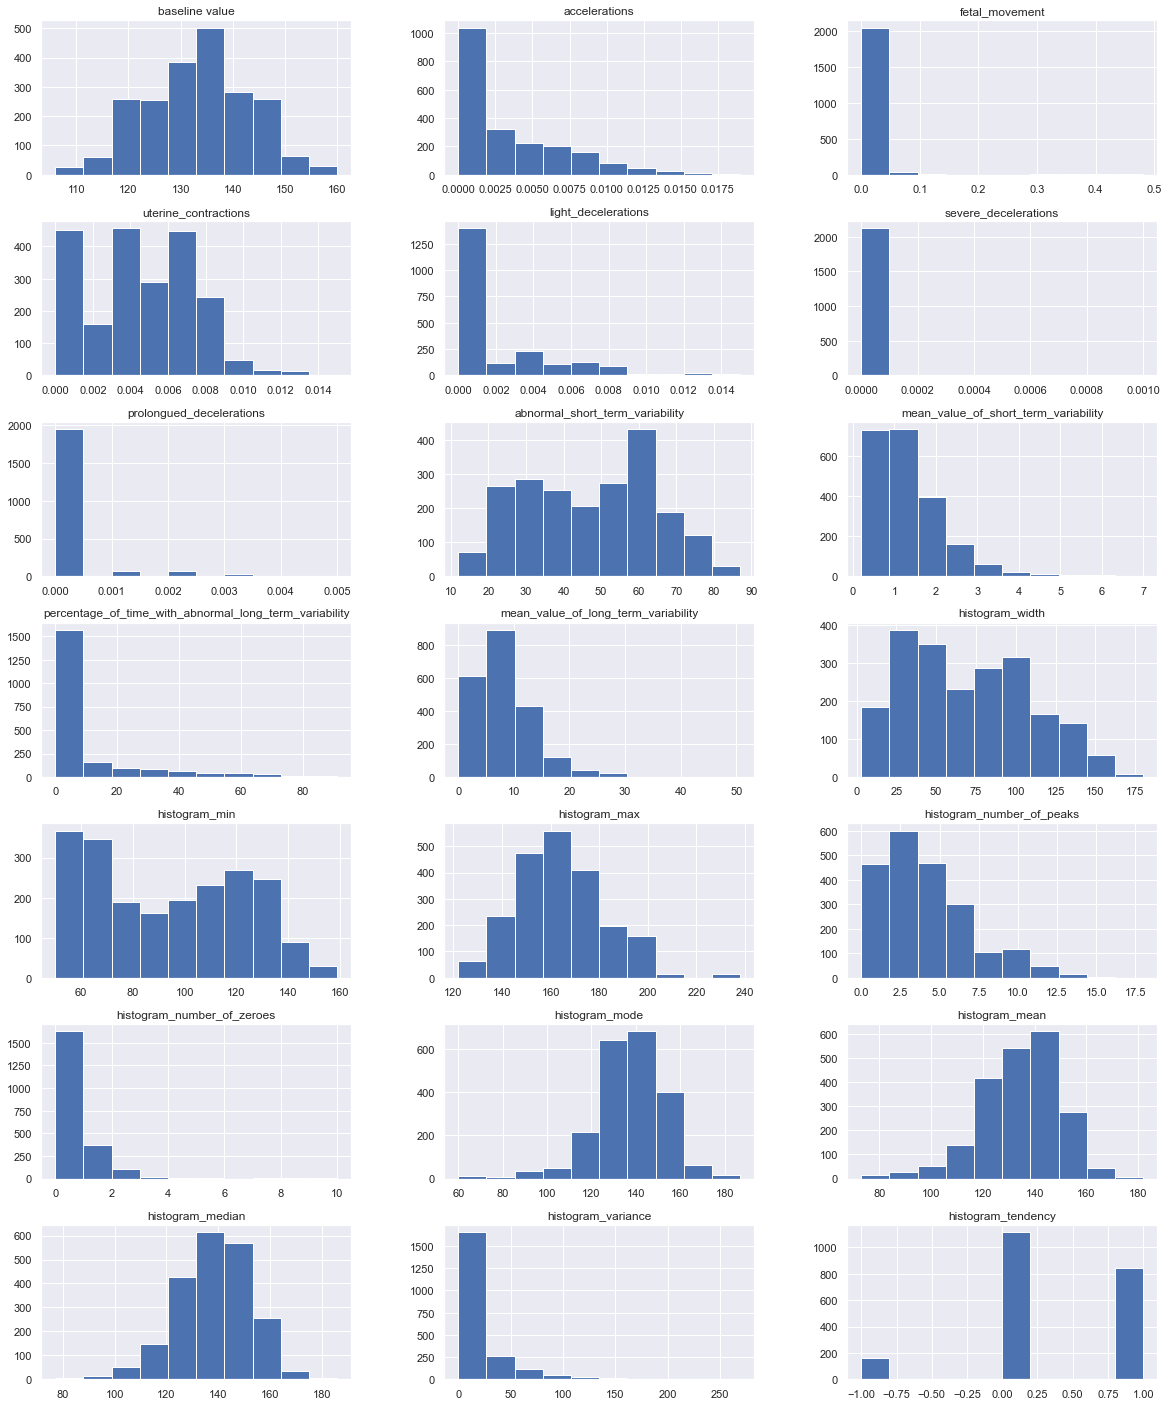

In [22]:
df.iloc[:,:-1].hist(figsize=[20,25], layout=[7,3])

#### Looking carefully to every histogram we could say that at least 8 features are extremely skewed and contain a significant amount of outliers, giving us the idea that these could be scaled using the technique 'robust scaling', but all of these values are correct and confirmed by the publisher of the dataset.
#### Also we can see that the features had already been processed because some of them were created by binning or encoding categorical ordinal variables, such as: Light_decelerations, prolongued_decelerations, severe_decelerations, histogram_number_of_zeroes and histogram_tendency, which contain a specific number of possible values. Even the label was encoded too in this process this is why we had numbers instead of the apropriate name of the classes.
#### About all others which were not mentioned above correspond to numerical continuous features, some of these are already standardized whereas others not yet. In order to assure a flawless performance of the classifiers models we will scale every feature by standardization.

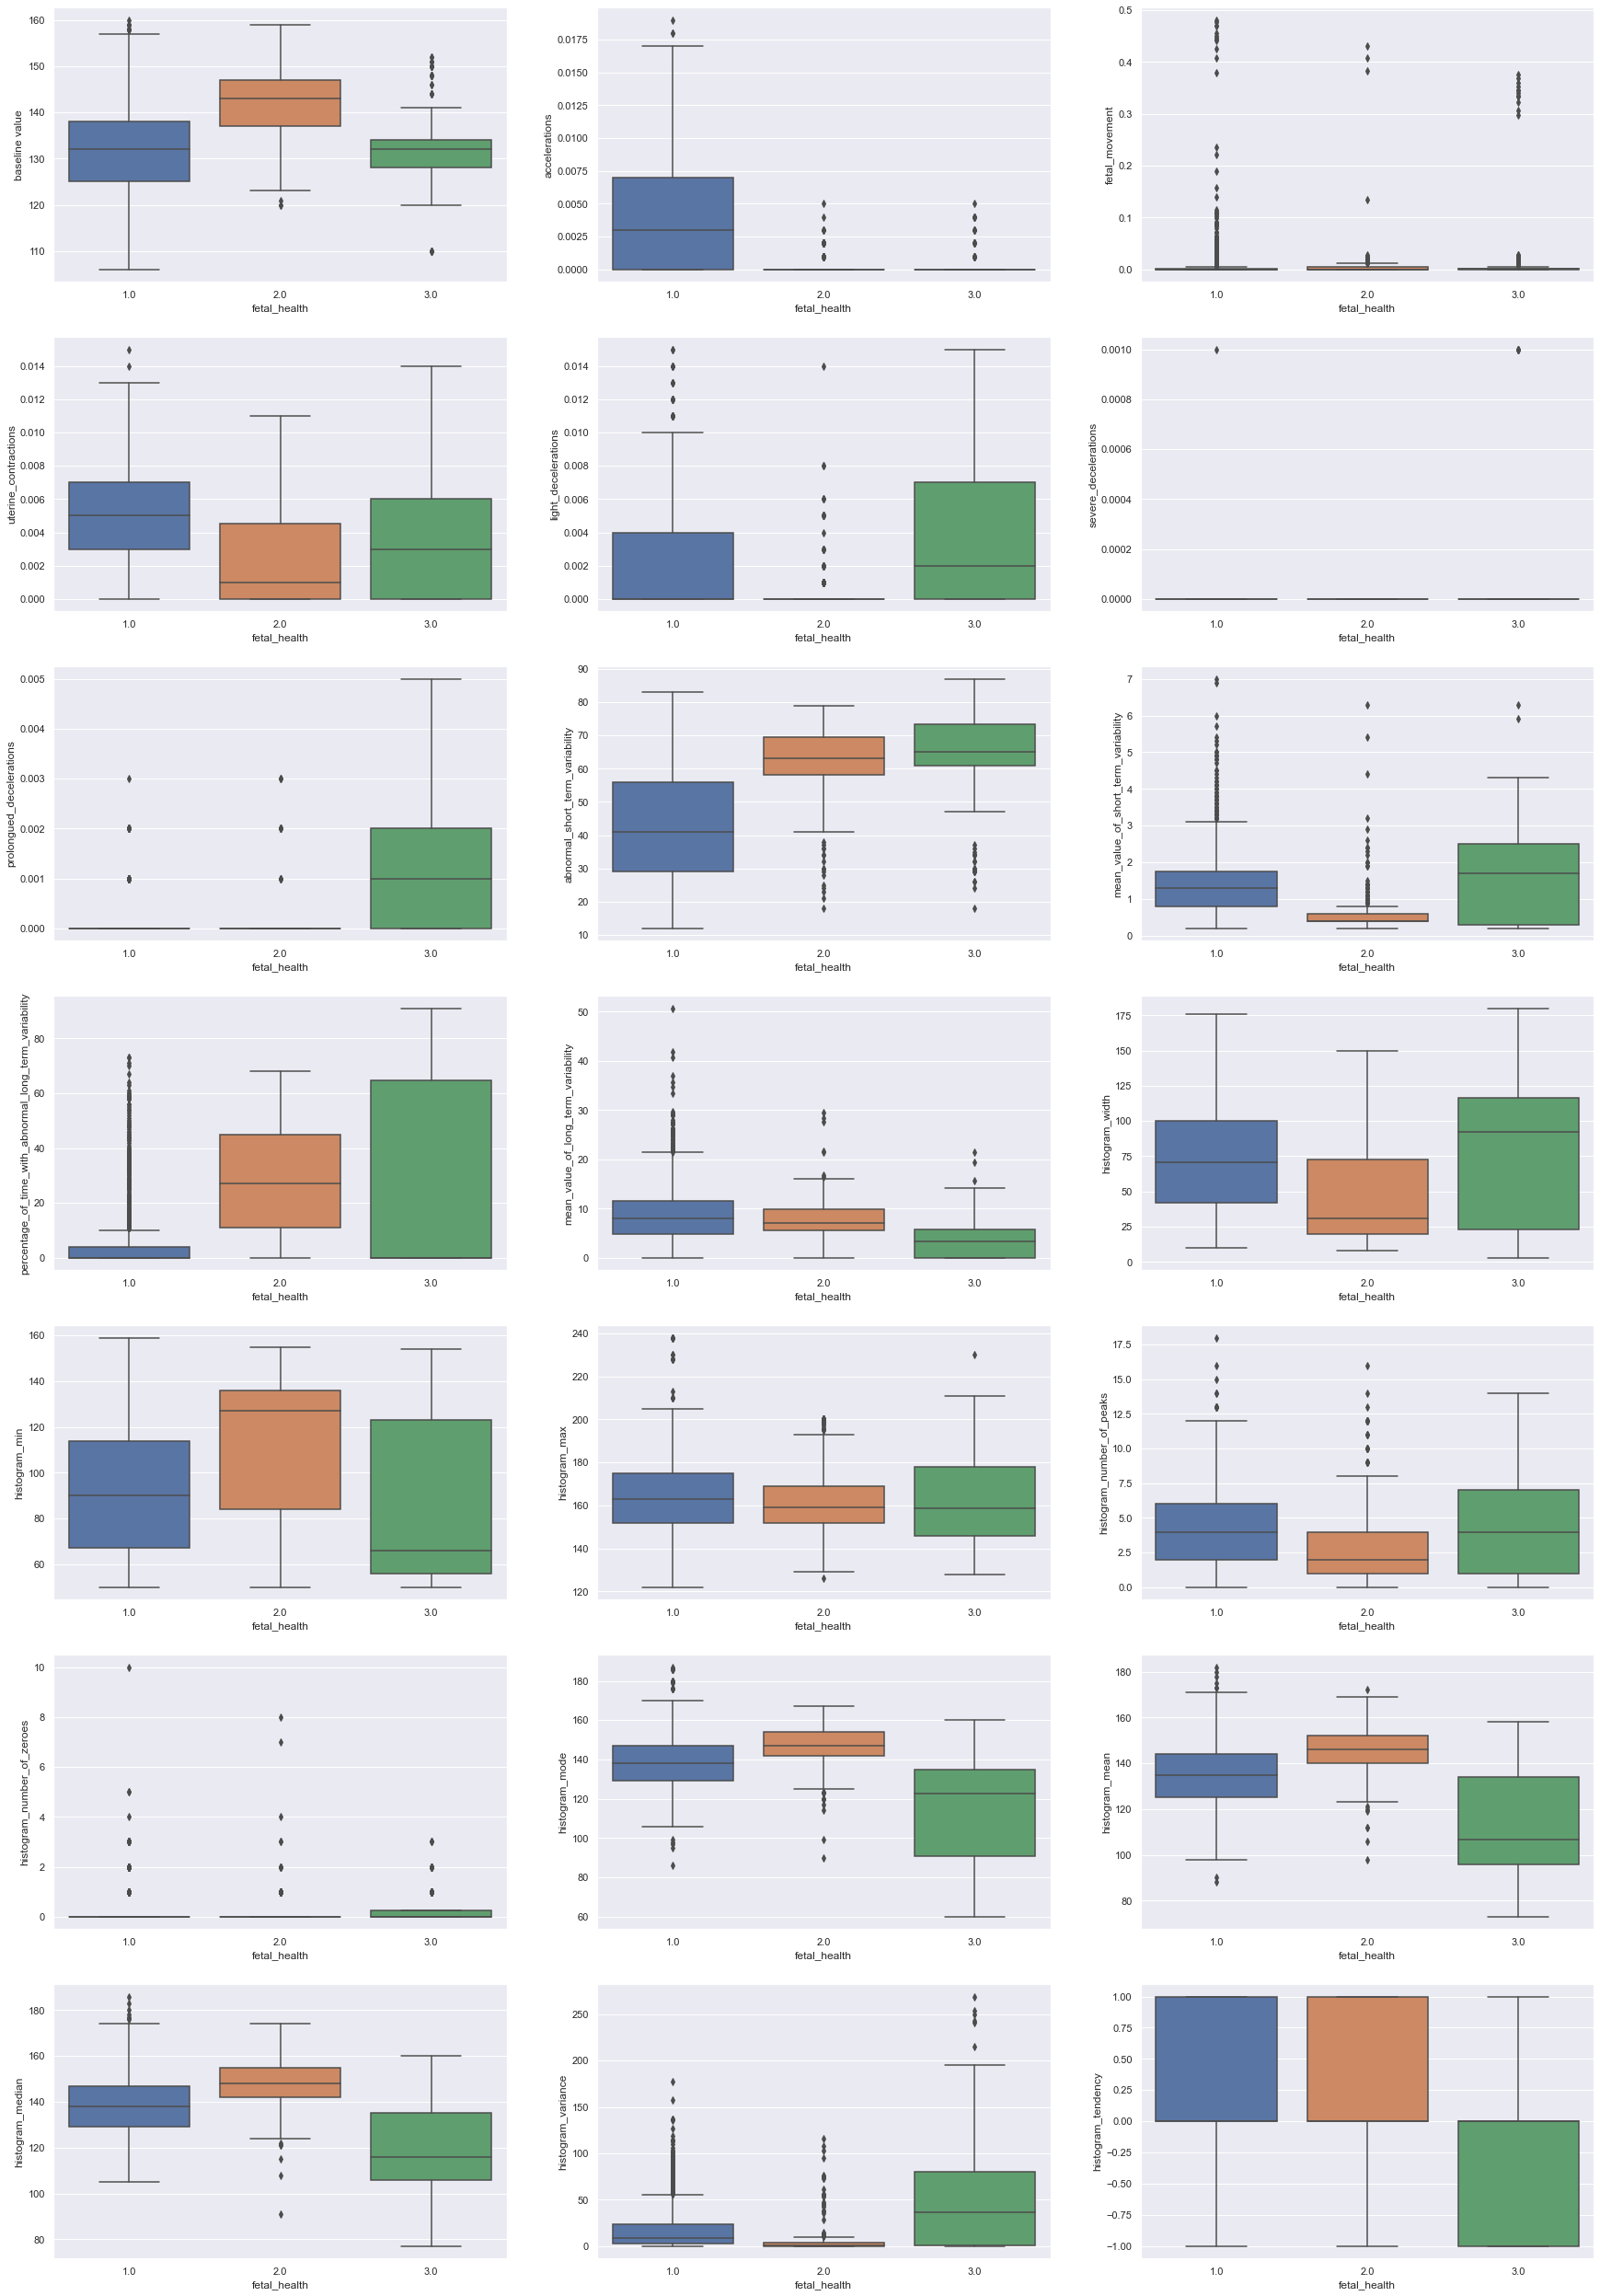

In [23]:
plt.figure(figsize=(30,45))
i=1
for feat in df.iloc[:,:-1].columns:
    plt.subplot(7,3,i)
    sns.boxplot(x='fetal_health',y=feat,data=df)
    i+=1

### Pearson Correlation

(0.0, 22.0)

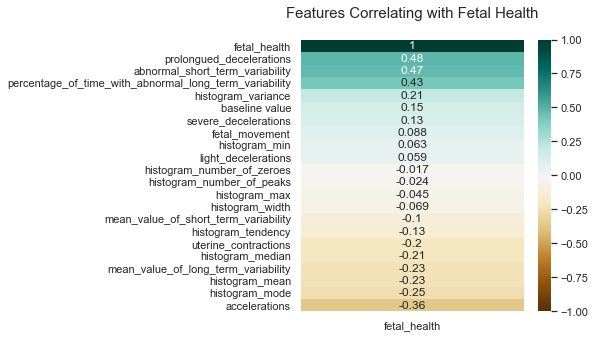

In [28]:
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(df.corr()[['fetal_health']].sort_values(by='fetal_health', ascending=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Fetal Health', fontdict={'fontsize':15}, pad=22)
heatmap.set_ylim([0,22])

In [31]:
features = df.iloc[:,:-1]
label=df['fetal_health']

In [32]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
df3 = pf.fit_transform(features)

In [33]:
df3.shape

(2126, 252)

In [34]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(features.columns,p) for p in pf.powers_]]
output_df = pd.DataFrame(df3, columns = target_feature_names)

### Oversampling

In [35]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(output_df, label)

In [36]:
X_res.shape

(4965, 252)

In [37]:
y_res.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res , random_state=42, test_size = 0.3)

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

In [40]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [41]:
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegressionCV

lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train_s, y_train)

C:\Users\ENVY 15\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\ENVY 15\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\ENVY 15\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\ENVY 15\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\ENVY 15\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\ENVY 15\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear fai

In [44]:
pd.DataFrame(lr_l2.coef_.T, columns=[0,1,2])



,0,1,2
0,-11.764837,33.901614,-2.601186
1,8.116339,-21.471733,-1.094693
2,5.370448,-10.336689,1.292461
3,-8.664022,-0.323178,-4.910662
4,1.744229,-19.235531,1.127369
...,...,...,...
247,5.855932,3.491748,0.026796
248,4.672330,-10.900925,2.970350
249,-6.154830,2.071708,0.761265
250,-2.028194,15.726782,-8.946614


In [45]:
y_pred_lr=lr_l2.predict(X_test_s).T
pd.DataFrame(y_pred_lr,columns=['Class predicted']).head(10)

,Class predicted
0,2.0
1,1.0
2,1.0
3,3.0
4,1.0
5,2.0
6,2.0
7,1.0
8,1.0
9,3.0


In [46]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95       520
         2.0       0.91      0.97      0.94       485
         3.0       0.99      0.99      0.99       485

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490



In [47]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1)
oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    RF.set_params(n_estimators=n_trees)
    RF.fit(X_train_s, y_train)
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

,oob
n_trees,
15.0,0.038561
20.0,0.031655
30.0,0.027338
40.0,0.026763
50.0,0.025036
100.0,0.023022
150.0,0.020719
200.0,0.020432
300.0,0.020144


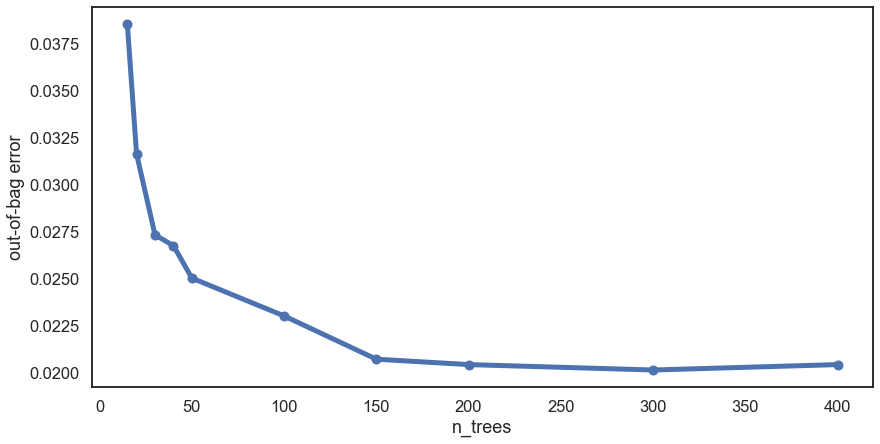

In [49]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [50]:
RF_300 = RandomForestClassifier(n_estimators=300
          ,oob_score=True 
          ,random_state=42
          ,n_jobs=-1)

RF_300.fit(X_train_s,y_train)
oob_error300 = 1 - RF_300.oob_score_
oob_error300

0.020143884892086295

In [51]:
y_pred_rf=RF_300.predict(X_test_s)

In [52]:
y_pred_rf=RF_300.predict(X_test_s).T
pd.DataFrame(y_pred_rf,columns=['Class predicted']).head(10)

,Class predicted
0,2.0
1,1.0
2,1.0
3,3.0
4,1.0
5,2.0
6,2.0
7,1.0
8,2.0
9,3.0


In [53]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       520
         2.0       0.95      0.98      0.97       485
         3.0       0.99      1.00      0.99       485

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

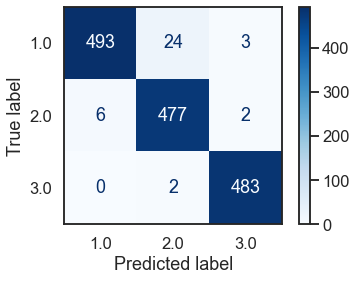

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), display_labels=RF_300.classes_)
disp.plot(cmap='Blues')

In [56]:
from sklearn.metrics import roc_curve, precision_recall_curve
sns.set_context('talk')

In [57]:
y_prob = RF_300.predict_proba(X_test_s)

In [58]:
y_test_b=label_binarize(y_test, classes=[1,2,3])

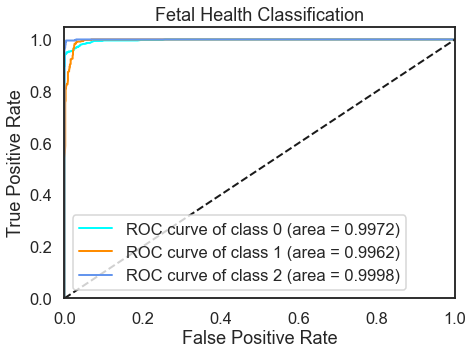

In [62]:
from itertools import cycle
from sklearn.metrics import auc
fpr = dict()
tpr = dict()
roc_auc = dict()

n_class = 3
lw = 2
plt.figure(figsize=(7,5))

for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_class), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=lw,label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fetal Health Classification')
plt.legend(loc='best')
plt.show()

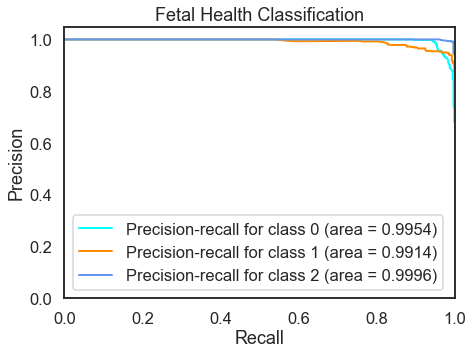

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()
lines = []
labels = []
plt.figure(figsize=(7,5))

for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(y_test_b[:, i],y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_b[:, i], y_prob[:, i])

for i, color in zip(range(n_class), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label='Precision-recall for class {0} (area = {1:0.4f})'
             ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Fetal Health Classification')
plt.legend(loc='lower left')
plt.show()

[Text(0.5, 0, 'Features')]

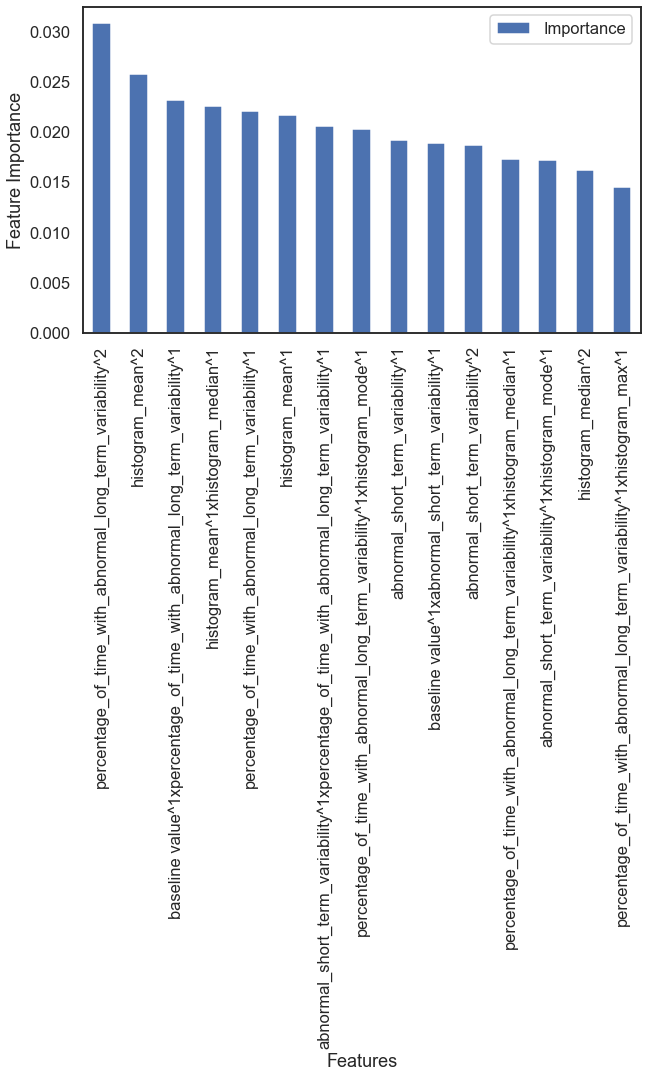

In [64]:
feat=pd.DataFrame(RF_300.feature_importances_,index=X_res.columns, columns=['Importance']).sort_values(by='Importance',ascending=False).head(15)
ax=feat.plot(kind='bar', figsize=(10,6))
ax.set(ylabel='Feature Importance')
ax.set(xlabel='Features')